In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [149]:
data=pd.read_csv('train_v9rqX0R.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [150]:
data.shape

(8523, 12)

In [151]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [152]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [153]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
cat_col=[]
for x in data.dtypes.index:
  if data.dtypes[x]=='object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [155]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [156]:
for col in cat_col:
  print(col)
  print(data[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [157]:
data['Item_Weight'].fillna(data['Item_Weight'].mode()[0],inplace=True)

In [158]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [159]:
sum(data['Item_Visibility']==0)

526

In [160]:
data.loc[:,'Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace=True)

In [161]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [162]:
#combine item fat content
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# **creation of new atributes**

In [163]:
data['New_Item_Type']=data['Item_Identifier'].apply(lambda x:x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [164]:
data['New_Item_Type']=data['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [165]:
data.loc[data['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [166]:
#create small values for establishment year
data['Outlet_Year']=2013-data['Outlet_Establishment_Year']
data['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

In [167]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


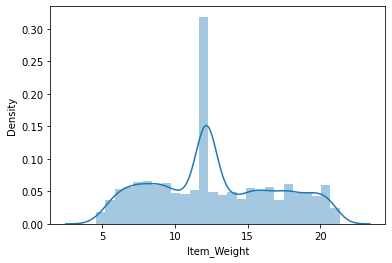

In [168]:
sns.distplot(data['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


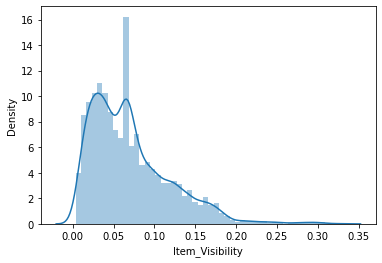

In [169]:
sns.distplot(data['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


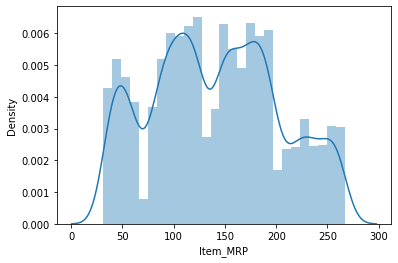

In [170]:
sns.distplot(data['Item_MRP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


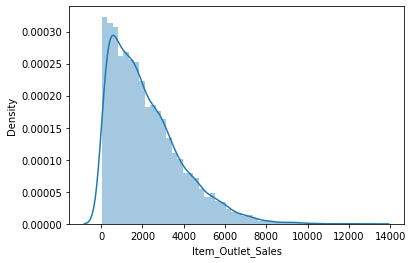

In [171]:
sns.distplot(data['Item_Outlet_Sales'])

In [172]:
#log transformation
data['Item_Outlet_Sales']=np.log(1+data['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


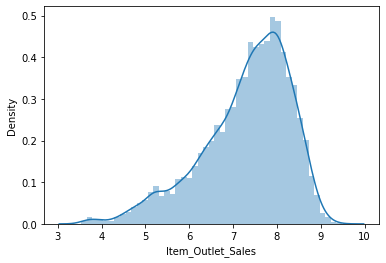

In [173]:
sns.distplot(data['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


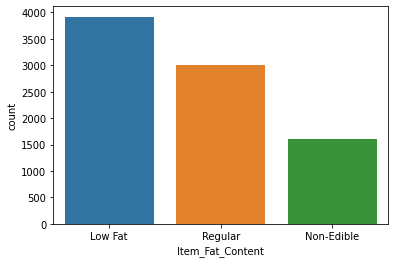

In [174]:
sns.countplot(data['Item_Fat_Content'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


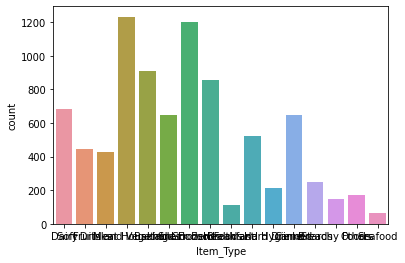

In [175]:
sns.countplot(data['Item_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


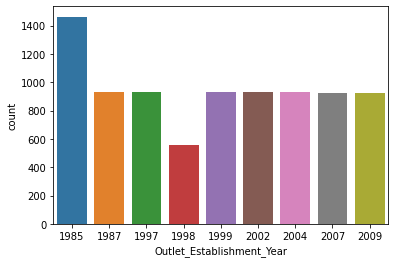

In [176]:
sns.countplot(data['Outlet_Establishment_Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


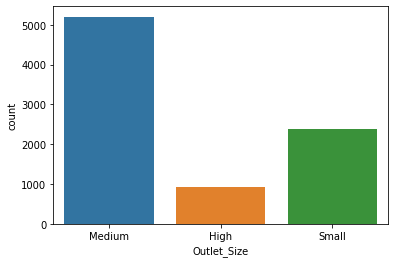

In [177]:
sns.countplot(data['Outlet_Size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


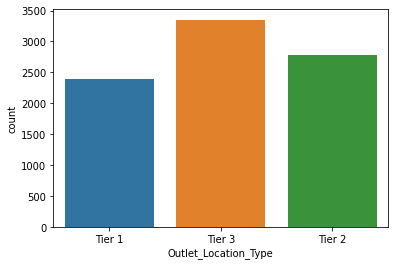

In [178]:
sns.countplot(data['Outlet_Location_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


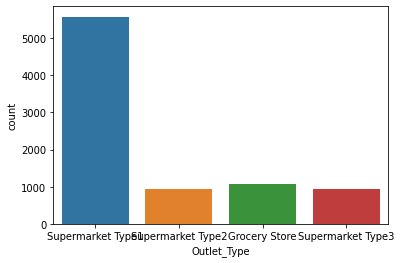

In [179]:
sns.countplot(data['Outlet_Type'])

# Correlation Matrics

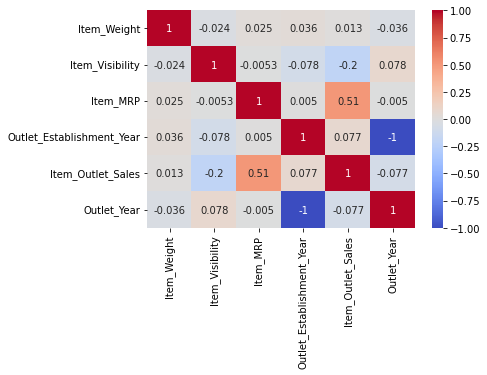

In [180]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
 13  Outlet_Year                8523 non-null   int64

# Label Encoding

In [182]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet_Identifier']=le.fit_transform(data['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
  data[col]=le.fit_transform(data[col])

One Hot Encoder

In [184]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,9,1999,8.225808,14,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,6.096776,4,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,9,1999,7.648868,14,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,0,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,1,1987,6.903451,26,0,...,0,0,1,0,1,0,0,0,0,1


Train Test Split

In [185]:
x=data.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=data['Item_Outlet_Sales']

# Model Training

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
  #train the model
  model.fit(x,y)
 
  #predicting the training set
  pred=model.predict(x)
 
  #perform cross validation
  cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error')  
  cv_score=np.abs(np.mean(cv_score))
 
  print('MSE:',mean_squared_error(y,pred))
  print('cv score:',cv_score)


In [189]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [190]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [191]:
x_test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
7503,14.300,0.026300,5,79.4302,26,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2957,7.930,0.071136,8,42.7086,16,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
7031,14.500,0.041313,3,42.0454,14,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1084,12.150,0.044767,14,173.7054,28,0,0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
856,10.195,0.012456,10,197.5110,9,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,11.800,0.093656,13,127.1704,16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3257,7.020,0.066132,6,148.1734,4,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
6346,14.500,0.041215,3,42.0454,26,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
6318,9.800,0.141184,0,50.5008,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [192]:
from sklearn.metrics import mean_squared_error,r2_score

In [193]:
print('MSE:',mean_squared_error(y_test,predictions))
print('R Squared Error:',r2_score(y_test,predictions))

MSE: 0.2838360413827297
R Squared Error: 0.7300255519849717


In [194]:
from sklearn.tree import DecisionTreeRegressor

In [195]:
dt_clf=DecisionTreeRegressor()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [196]:
print('MSE:',mean_squared_error(y_test,y_pred_dt))
print('R Squared Error:',r2_score(y_test,y_pred_dt))

MSE: 0.5379270895909175
R Squared Error: 0.48834345216641284


In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
rf_clf=RandomForestRegressor()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_clf=rf_clf.predict(x_test)

In [199]:
print('MSE:',mean_squared_error(y_test,y_pred_clf))
print('R Squared Error:',r2_score(y_test,y_pred_clf))

MSE: 0.29651171489297684
R Squared Error: 0.7179689155462846


In [260]:
data1=pd.read_csv('test_AbJTz2l.csv')

In [261]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [262]:
data1.shape

(5681, 11)

In [227]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [228]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [263]:
data1.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [264]:
cat_col=[]
for x in data1.dtypes.index:
  if data1.dtypes[x]=='object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [265]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [266]:
for col in cat_col:
  print(col)
  print(data1[col].value_counts())
  print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [267]:
data1['Outlet_Size'].fillna(data1['Outlet_Size'].mode()[0],inplace=True)

In [268]:
data1['Item_Weight'].fillna(data1['Item_Weight'].mode()[0],inplace=True)

In [269]:
sum(data1['Item_Visibility']==0)

353

In [270]:
data1.loc[:,'Item_Visibility'].replace([0],[data1['Item_Visibility'].mean()],inplace=True)

In [271]:
#combine item fat content
data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [275]:
data1['New_Item_Type']=data1['Item_Identifier'].apply(lambda x:x[:2])
data1['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [276]:
data1['New_Item_Type']=data1['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data1['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [277]:
data1.loc[data1['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data1['Item_Fat_Content'].value_counts()


Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [278]:
#create small values for establishment year
data1['Outlet_Year']=2013-data1['Outlet_Establishment_Year']
data1['Outlet_Year']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Year, Length: 5681, dtype: int64

In [279]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Outlet_Identifier']=le.fit_transform(data1['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
  data1[col]=le.fit_transform(data1[col])

In [280]:
data11=pd.get_dummies(data1,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
data11

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750,0.007565,13,107.8622,9,1999,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300,0.038428,4,87.3198,2,2007,6,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600,0.099575,11,241.7538,0,1998,15,0,1,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315,0.015388,13,155.0340,2,2007,6,1,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,10.500,0.118599,4,234.2300,5,1985,28,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0.013496,13,141.3154,8,1997,16,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,FDD47,7.600,0.142991,15,169.1448,3,2009,4,0,0,...,0,0,1,0,0,1,0,0,1,0
5678,NCO17,10.000,0.073529,8,118.7440,7,2002,11,0,1,...,0,1,0,0,1,0,0,0,0,1
5679,FDJ26,15.300,0.065684,3,214.6218,2,2007,6,0,0,...,0,1,0,0,1,0,0,0,1,0


In [284]:
data11.shape

(5681, 24)

In [285]:
x=data11.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])

In [286]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,20.750,0.007565,13,107.8622,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,8.300,0.038428,4,87.3198,6,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,14.600,0.099575,11,241.7538,15,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,7.315,0.015388,13,155.0340,6,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,10.500,0.118599,4,234.2300,28,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,13,141.3154,16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600,0.142991,15,169.1448,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5678,10.000,0.073529,8,118.7440,11,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5679,15.300,0.065684,3,214.6218,6,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [287]:
predict=model.predict(x)

In [288]:
output=pd.DataFrame({'item identifier':data11.Item_Identifier,'outlet identifier':data11.Outlet_Identifier,'item outlet sales':predict})

In [289]:
output

,item identifier,outlet identifier,item outlet sales
0,FDW58,9,7.223507
1,FDW14,2,7.114226
2,NCN55,0,6.394931
3,FDQ58,2,7.671542
4,FDY38,5,8.802391
...,...,...,...
5676,FDB58,8,7.532996
5677,FDD47,3,7.577770
5678,NCO17,7,7.302161
5679,FDJ26,2,8.146515


In [290]:
output.to_csv('sumission.csv',index=False)